In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\HP\Downloads\demo_data\demo_data\8.twospirals.csv",header=None)

In [3]:
data.head()

,0,1,2
0,-2.543456,-10.816358,0
1,9.434466,-2.572000,0
2,3.368646,-10.194671,0
3,1.341407,-4.204140,0
4,9.547758,-2.220580,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2000 non-null   float64
 1   1       2000 non-null   float64
 2   2       2000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


In [5]:
data.shape

(2000, 3)

In [6]:
data.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [7]:
data.duplicated().sum()

0

C:\Users\HP\OneDrive\Documents\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

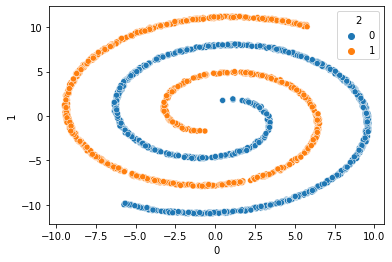

In [8]:
sns.scatterplot(data[0],data[1],hue=data[2])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[[0,1]],data[2],test_size=0.2,random_state=42)

In [10]:
X_train.shape,X_test.shape

((1600, 2), (400, 2))

In [11]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_tr = scale.fit_transform(X_train)
X_test_tr = scale.transform(X_test)

In [12]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [13]:
model = Sequential()

model.add(Dense(5,activation="relu",input_dim=2))
model.add(Dense(3,activation="relu"))
model.add(Dense(2,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
 dense_2 (Dense)             (None, 2)                 8         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 44
Trainable params: 44
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [29]:
history = model.fit(X_train_tr,y_train,epochs=50,batch_size=12,validation_split=0.2)

Epoch 1/50
107/107 [==============================] - 0s 2ms/step - loss: 1.3401e-05 - accuracy: 1.0000 - val_loss: 1.9739e-05 - val_accuracy: 1.0000
Epoch 2/50
107/107 [==============================] - 0s 2ms/step - loss: 1.3563e-05 - accuracy: 1.0000 - val_loss: 1.9040e-05 - val_accuracy: 1.0000
Epoch 3/50
107/107 [==============================] - 0s 2ms/step - loss: 1.3049e-05 - accuracy: 1.0000 - val_loss: 1.9550e-05 - val_accuracy: 1.0000
Epoch 4/50
107/107 [==============================] - 0s 3ms/step - loss: 1.2872e-05 - accuracy: 1.0000 - val_loss: 1.8089e-05 - val_accuracy: 1.0000
Epoch 5/50
107/107 [==============================] - 0s 2ms/step - loss: 1.2886e-05 - accuracy: 1.0000 - val_loss: 1.7887e-05 - val_accuracy: 1.0000
Epoch 6/50
107/107 [==============================] - 0s 2ms/step - loss: 1.2878e-05 - accuracy: 1.0000 - val_loss: 1.7330e-05 - val_accuracy: 1.0000
Epoch 7/50
107/107 [==============================] - 0s 2ms/step - loss: 1.2668e-05 - accuracy: 1.0

In [30]:
y_cap=model.predict(X_test_tr)

13/13 [==============================] - 0s 2ms/step


In [31]:
y_capf=np.where(y_cap>0.5,1,0)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

1.0

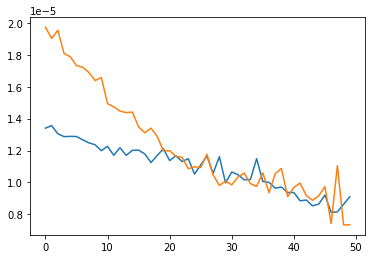

In [33]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [34]:
from mlxtend.plotting import plot_decision_regions

3888/3888 [==============================] - 4s 922us/step


<AxesSubplot:>

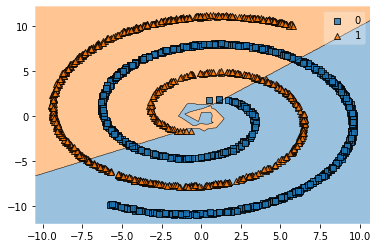

In [35]:
plot_decision_regions(data[[0,1]].values,data[2].values.astype(int),clf=model)

3888/3888 [==============================] - 4s 922us/step


<AxesSubplot:>

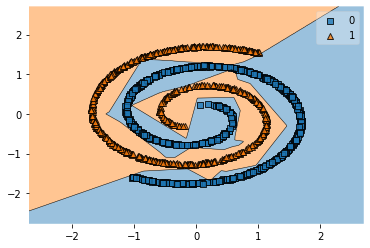

In [36]:
plot_decision_regions(X_train_tr,y_train.values.astype(int),clf=model)

3888/3888 [==============================] - 4s 940us/step


<AxesSubplot:>

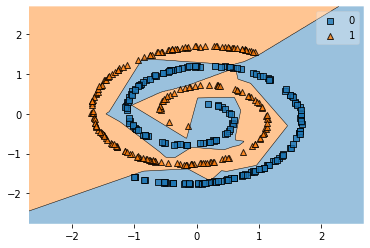

In [37]:
plot_decision_regions(X_test_tr,y_test.values.astype(int),clf=model)